In [2]:
import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
rating_file_path = "ml-1m/ratings.dat"
movie_file_path = "ml-1m/movies.dat"
user_file_path = "ml-1m/users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path, 
                                     names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::')
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [7]:
# null 데이터 확인
print(rating_data.isnull().sum())
print(movie_data.isnull().sum())
print(user_data.isnull().sum())

user_id     0
movie_id    0
rating      0
time        0
dtype: int64
movie_id    0
title       0
genre       0
dtype: int64
user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64


[분석할 영화의 정보 탐색하기]

In [8]:
# 년도만 출력
movie_data['title'][1][-5:-1]

'1995'

In [9]:
# 총 영화의 개수를 출력.
print("영화 개수 :", len(movie_data['movie_id'].unique()))

# 연도별 영화 개수가 많은 Top 10 년도를 출력합니다.
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data['year'].value_counts().head(10)

영화 개수 : 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [10]:
# 연대별 영화의 개수를 출력
# 연대별로 title수정후 year_term컬럼에 저장
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
# 연대별 개수로 출력후, 연대별 정렬
moview_year_term = movie_data['year_term'].value_counts().sort_index()
print(moview_year_term)

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


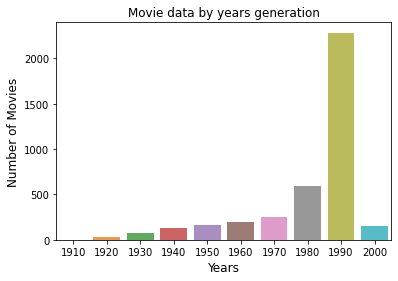

In [11]:
# 연대별 그래프 출력 - seaborn은 matplotlib보다 간결함,시각적으로 더 좋음
# seaborn as sns은 matplotlib함께 import 해야 함.
sns.barplot(moview_year_term.index, moview_year_term.values, alpha=0.8)
plt.title('Movie data by years generation')
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

[장르의 속성 탐색]

In [12]:
movie_data.head()

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990


In [13]:
# Action이 포함되어 있는 영화 : 503개
movie_data[movie_data['genre'].str.contains('Action')]

,movie_id,title,genre,year,year_term
5,6,Heat (1995),Action|Crime|Thriller,1995,1990
8,9,Sudden Death (1995),Action,1995,1990
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,1990
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,1990
19,20,Money Train (1995),Action,1995,1990
...,...,...,...,...,...
3807,3877,Supergirl (1984),Action|Adventure|Fantasy,1984,1980
3809,3879,Art of War The (2000),Action,2000,2000
3819,3889,Highlander: Endgame (2000),Action|Adventure|Fantasy,2000,2000
3828,3898,Bait (2000),Action|Comedy,2000,2000


In [14]:
# 장르에서 Action만 있는 것 : 65개 , 포함되어 있는 것 : 503개
data = movie_data['genre'].apply( lambda x: x=='Action' )
movie_data[data]

,movie_id,title,genre,year,year_term
8,9,Sudden Death (1995),Action,1995,1990
19,20,Money Train (1995),Action,1995,1990
70,71,Fair Game (1995),Action,1995,1990
143,145,Bad Boys (1995),Action,1995,1990
202,204,Under Siege 2: Dark Territory (1995),Action,1995,1990
...,...,...,...,...,...
3564,3633,On Her Majesty's Secret Service (1969),Action,1969,1960
3566,3635,Spy Who Loved Me The (1977),Action,1977,1970
3570,3639,Man with the Golden Gun The (1974),Action,1974,1970
3700,3769,Thunderbolt and Lightfoot (1974),Action,1974,1970


In [15]:
# 가장 많이 사용된 장르의 조합을 출력. (Top 10)
movie_data['genre'].value_counts()[:10]

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: genre, dtype: int64

In [16]:
# 영화장르별 개수 추출 (예시 : Drama)
unique_genre_dict = {}
# 1개 행씩 가져오기
for index, row in movie_data.iterrows():
    # genre 피처를 ‘|’ 구분자로 분리.
    genre_combination = row['genre']
    #list타입
    parsed_genre = genre_combination.split("|")
    
    # 구분자로 분리한 장르의 속성을 unique_genre_dict에 각각 계산하여 저장합니다.
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


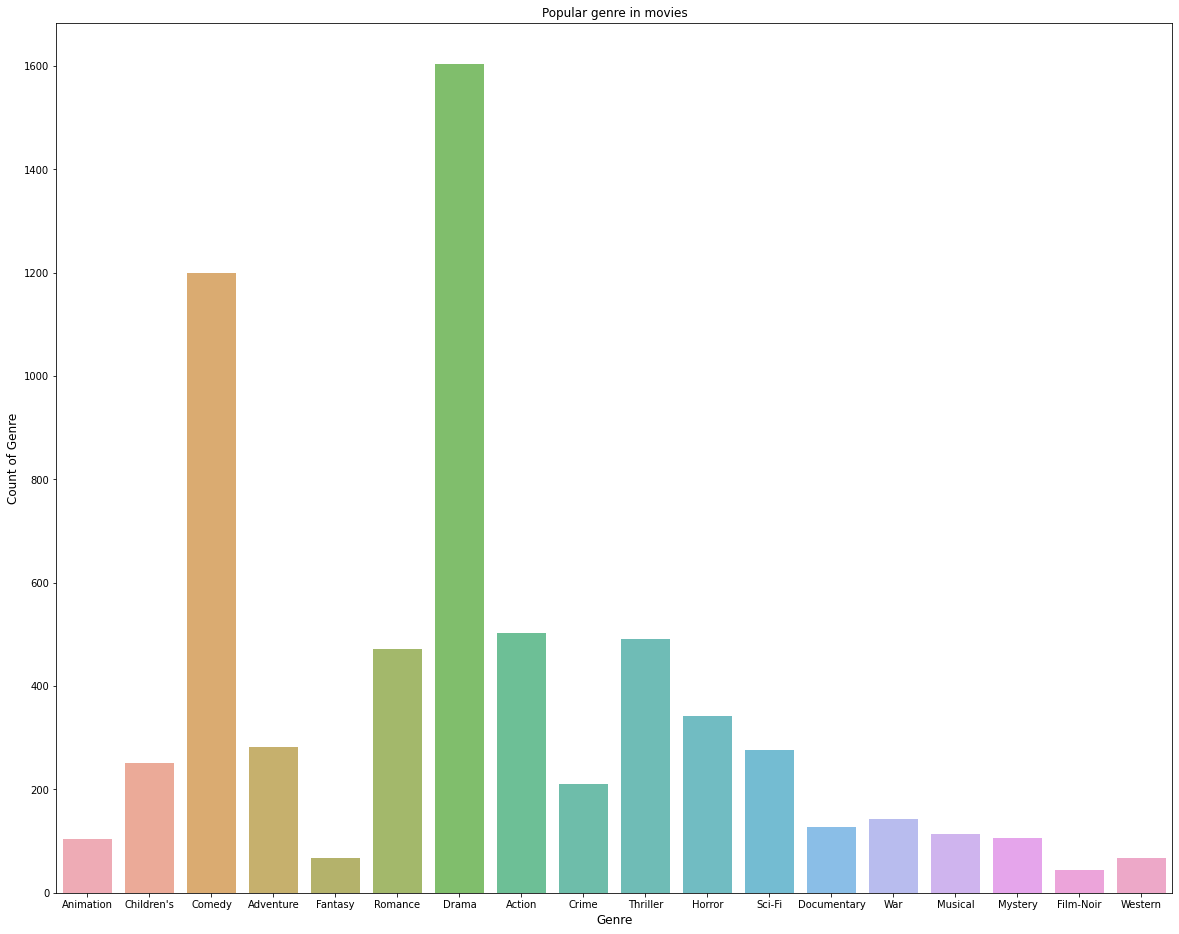

In [17]:
# unique_genre_dict를 이용하여 장르의 속성을 그래프로 출력.
# rcParams["figure.figsize"] (가로 길이, 세로길이) 로 구성
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

[분석할 유저의 정보 탐색하기]

In [18]:
# 유저의 수를 탐색.
print("전체회원 수 :", len(user_data['user_id'].unique()))

전체회원 수 : 6040


In [19]:
# 전체 영화 수 : 3883
len(movie_data)

3883

[미니 퀴즈 - 3.4]
* 유저 데이터에 대한 탐색적 데이터 분석을 실행해 봅시다. 
- 아래의 질문들에 답해보세요.
- 유저의 성별 탐색
- 유저의 연령대 탐색

In [20]:
user_data['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

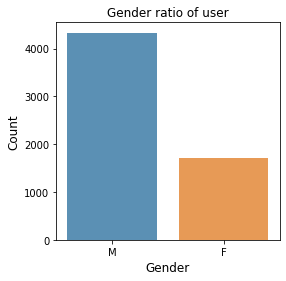

In [21]:
# 유저의 성별을 탐색합니다.
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = user_data['gender'].value_counts()
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title('Gender ratio of user')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [22]:
# 유저의 연령으로 탐색.
user_data['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [23]:
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + "0"

# 예시> 25 -> 2+"0" : 20
user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))
user_ages = user_data['ages'].value_counts()
user_ages

20         2096
30         1193
10         1103
50          876
40          550
outlier     222
Name: ages, dtype: int64

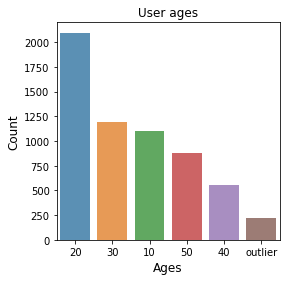

In [24]:
sns.barplot(user_ages.index, user_ages.values, alpha=0.8)
plt.title('User ages')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ages', fontsize=12)
plt.show()

[평점 데이터의 정보 탐색하기]

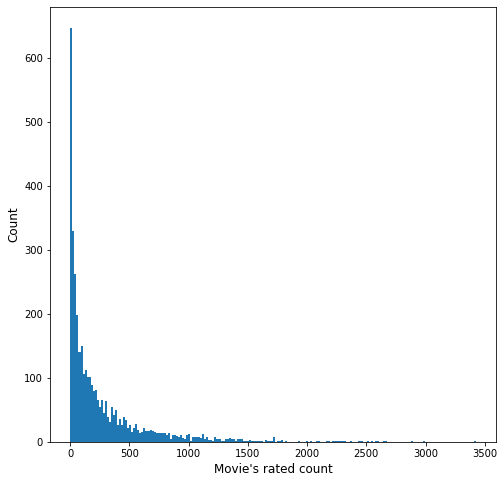

In [25]:
# 각 영화들이 평가받은 횟수 그래프 출력.
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()

In [26]:
# movie_rate_count : 영화평점 받은 개수
print("총 영화 개수 :", len(movie_data['movie_id'].unique()))
print("평점을 받은 개수가 100개이하 수  :", len(movie_rate_count[movie_rate_count < 100]))

총 영화 개수 : 3883
평점을 받은 개수가 100개이하 수  : 1687


In [27]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [28]:
# 영화별 평균 평점. rated_count
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
movie_grouped_rating_info.head(5)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


<AxesSubplot:>

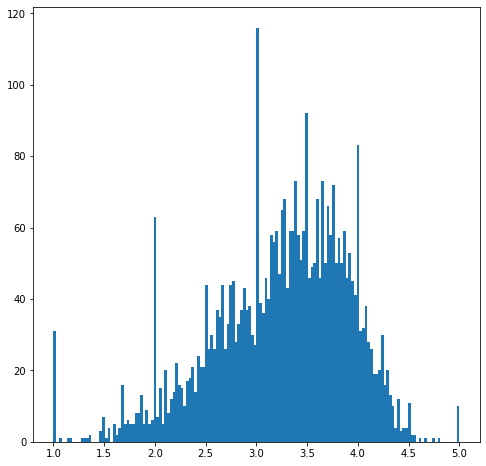

In [29]:
# 평균평점 그래프 출력 - bins:막대그래프 수 150개
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [30]:
movie_grouped_rating_info.head(2)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141


In [31]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 출력.
# movie_grouped_rating_info 컬럼 3개 : movie_id,rated_count,rating_mean
# merge 병합: movie_id기준으로 movie_grouped_rating_info에 있는 것은 모두 적용
merged_data = movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
# 평점받은 개수가 100개 이상이면서, 평균평점 상위 10개 출력
merged_data[merged_data['rated_count'] > 100][['rating_mean', 'title']].nlargest(10, 'rating_mean')

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,Shawshank Redemption The (1994)
802,4.524966,Godfather The (1972)
708,4.520548,Close Shave A (1995)
49,4.517106,Usual Suspects The (1995)
513,4.510417,Schindler's List (1993)
1066,4.507937,Wrong Trousers The (1993)
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


[미니 퀴즈 - 3.5]
* 동일한 방식으로, 유저 그룹 단위의 평점 속성을 분석해 보세요.
* 유저별로 평가한 영화 개수
* 유저별로 평가한 평균 영화 점수
* 유저별로 평가한 영화 점수의 편차

In [32]:
rating_data.columns

Index(['user_id', 'movie_id', 'rating', 'time'], dtype='object')

In [33]:
# 유저별 영화 평가를 탐색합니다.
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count','mean', 'std'])
user_grouped_rating_info.columns = ['rated_count', 'rating_mean', 'rating_std']
user_grouped_rating_info.head()

,rated_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


<AxesSubplot:>

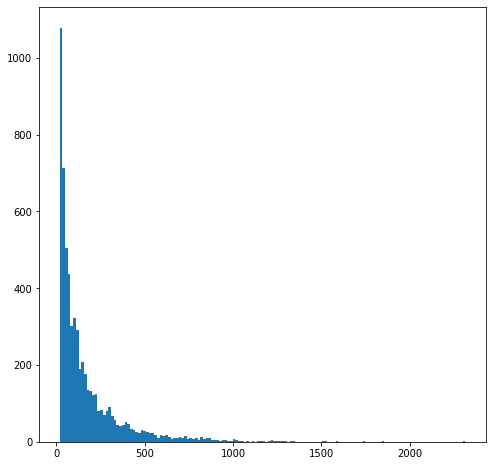

In [34]:
# 유저별로 평가한 영화 개수의 분포를 출력합니다.
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)

<AxesSubplot:>

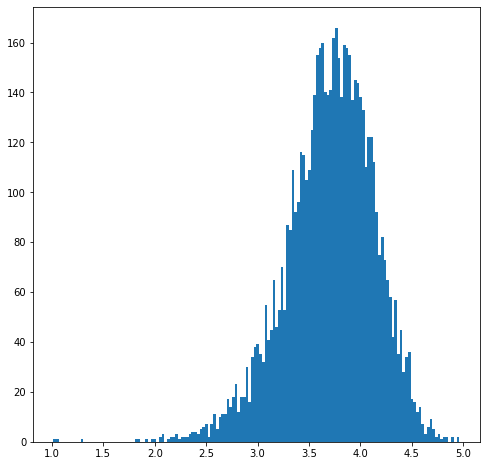

In [35]:
# 유저별로 평가한 영화 점수 평균의 분포를 그래프로 출력합니다.
user_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

<AxesSubplot:>

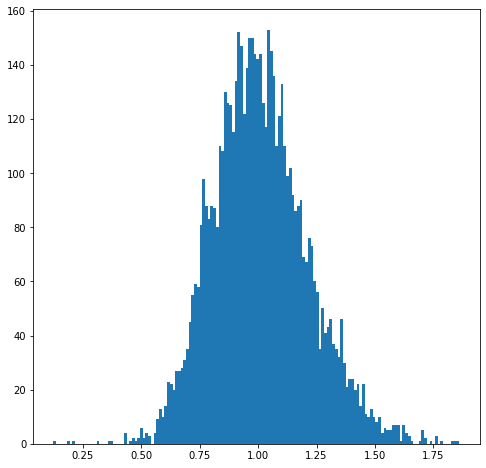

In [36]:
# 유저별로 평가한 영화 점수 편차의 분포를 그래프로 출력합니다.
user_grouped_rating_info['rating_std'].hist(bins=150, grid=False)

[user-movie 형태의 테이블로 살펴보기]

In [37]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [38]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성.
# user_id,movie_id index지정
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(["user_id", "movie_id"]).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

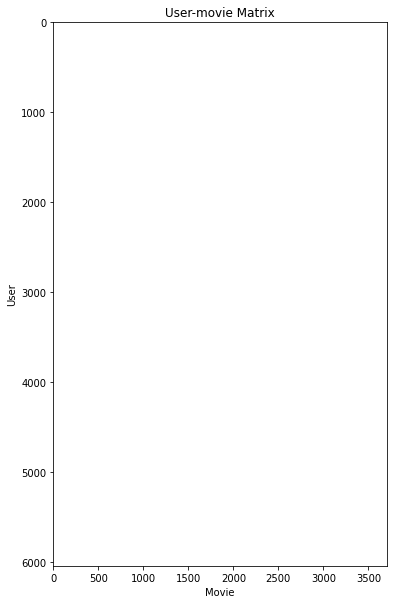

In [39]:
# user-movie 테이블을 시각화합니다.
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

<Step3. 예측> : 수학적 기법을 활용한 평점 예측

[SVD를 활용한 빈칸 채우기]
* 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
* (env_name) pip install surprise

In [63]:
# https://autumnrain.tistory.com/entry/scikit-surprise-install-%EC%84%A4%EC%B9%98
#  error: Microsoft Visual C++ 14.0 설치필요
# 설치후 pip install surprise 다시 설치
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
# 과학적 표기법 억제 # 1.500e-10 .500e+00  -> 0. 1.5 
np.set_printoptions(suppress=True)


In [67]:
# 데이터 프레임을 생성합니다.
ratings_dict = {'item_id': [1,2,3,1,2,3,2],
                'user_id': ['a','a','a','b','b','b','c'],
                'rating': [2,4,4,2,5,4,5]}
df = pd.DataFrame(ratings_dict)
df.head(10)

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [70]:
# 데이터 프레임을 행렬로 변환하여 확인합니다.
df_matrix_table = df[['user_id', 'item_id', 'rating']].set_index(["user_id", "item_id"]).unstack().fillna(0)
df_matrix_table.head(10)

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

SVD를 이용한 빈칸 채우기 학습
* 예제를 가지고 실습

In [60]:
rating_data.head(3)

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


예제 - 실제파일과 같은 타입형태로 예제구성

In [56]:
# SVD 사용을 위한 데이터셋을 생성합니다.
# 평점범위지정 1-5점
reader = Reader(rating_scale=(1, 5))
# 데이터를 surprise의 Dataset 형식으로 변환
data = Dataset.load_from_df(df=df[["user_id", "item_id", "rating"]], reader=reader)
# 행렬완성 데이터셋으로 변경
train_data = data.build_full_trainset()

In [71]:
# SVD 모델훈련.
model = SVD(n_factors=8,  ## n_factors : 잠재요인의 크기
            lr_all=0.005, ## 모든 파리미터 학습 비율
            reg_all=0.02, ## 모든 파라미터 정규화 정도
            n_epochs=10)
model.fit(train_data)

In [74]:
# 학습한 모델을 기반으로 빈공간의 점수를 예측합니다.

"""
build_anti_testset() : 
학습에 사용된 matrix에서 0으로 평가되어 있는(rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출.
"""

# test_data : 학습에 사용된 유저, 혹은 아이템이지만 점수는 매겨지지 않은 데이터.
# build_anti_testset() : 행렬의 채워져 있지 않는(0.0으로 되어 있는) 값 예측
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)

# 아래의 결과는 빈공간(test_data)의 점수를 예측한 결과입니다.
for _, iid, _, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "예측값 :", predicted_rating)

Item id 1 | 예측값 : 3.587645127556668
Item id 3 | 예측값 : 3.793153341106325


In [75]:
# 채워진 평점의 예측을 해서 나온 평점 출력
# 기존 평점과 비교
"""
build_testset() : 

학습에 사용된 matrix에서 0으로 평가되어 있는(rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출.
"""
# build_testset() : 행렬의 채워져 있는 값 예측
test_data = train_data.build_testset()
predictions = model.test(test_data)

# 원래부터 비어있지 않았던 행렬의 값들을 출력한 것입니다. real rating은 원래 값, predicted rating은 행렬 완성 후 예측된 값입니다.
for _, iid, r_ui, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "실제값(평점) :", r_ui, "|", "예측값 :", predicted_rating)

Item id 1 | 실제값(평점) : 2.0 | 예측값 : 3.4599479539975198
Item id 2 | 실제값(평점) : 4.0 | 예측값 : 3.844389472940998
Item id 3 | 실제값(평점) : 4.0 | 예측값 : 3.725256339850953
Item id 1 | 실제값(평점) : 2.0 | 예측값 : 3.5174685637487038
Item id 2 | 실제값(평점) : 5.0 | 예측값 : 3.8573854638722183
Item id 3 | 실제값(평점) : 4.0 | 예측값 : 3.748724458952645
Item id 2 | 실제값(평점) : 5.0 | 예측값 : 3.9029731560740766


[아직 평가하지 않은 영화의 점수 예측하기]
* MovieLens 데이터에 SVD 적용하기

In [76]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 63.79 seconds


영화의 점수를 예측할 타겟 유저 선정

In [77]:
# user_id가 4인 유저의 영화 평가 데이터 검색.
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [88]:
# user_id 4인 유저가 평가한 영화 히스토리 정보를 추출.
# movie_id : 평점 으로 dic타입 저장
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
            
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


타겟 유저가 보지 않은 영화 중, 예상 평점이 높은 10개 선정

In [89]:
# 타겟 유저(user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    # user_id가 평점을 입력한 영화는 스킵
    if movie_id in target_user_movie_rating_dict:
        continue
    # 그렇지 않으면 test_data에 저장
    test_data.append((target_user_id, movie_id, rating))

In [92]:
test_data[:5]

[(4, 1, 0), (4, 2, 0), (4, 3, 0), (4, 4, 0), (4, 5, 0)]